Dr. Tehreem Qasim tehreemqasim@hotmail.com

# Simple Linear Regression

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


#Salary prediction dataset


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datasets/structured/Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
#Looking for null values
df.isna().sum()

,0
YearsExperience,0
Salary,0


In [6]:
#Looking for duplicates

df.duplicated().sum()

0

In [7]:
from matplotlib import pyplot as plt

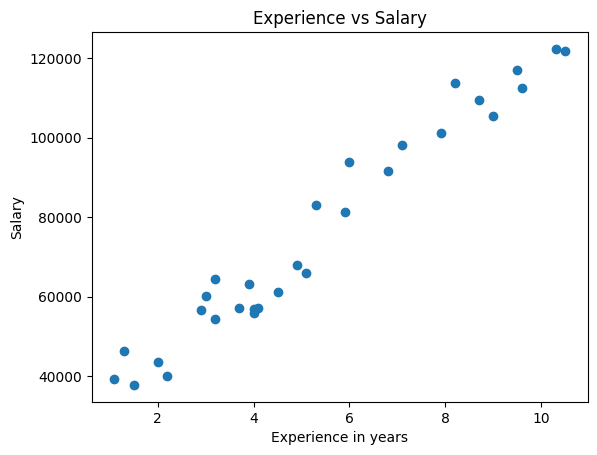

In [8]:
plt.scatter(df.YearsExperience, df.Salary)
plt.title("Experience vs Salary")
plt.xlabel("Experience in years")
plt.ylabel("Salary")
plt.show()

In [9]:
#Lets stpit the data into features X and labels y

X = df.drop("Salary",axis = 1)
y = df.Salary


In [10]:
#Now split the data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [12]:
#Creating object of the model
model = LinearRegression()
#Fitting the model on the data
model.fit(X_train, y_train)
#Making predictions on the test data
y_hat = model.predict(X_test)
#Computing the errors
mae = mean_absolute_error(y_test,y_hat)
mse = mean_squared_error(y_test,y_hat)

print(f"MAE is: {mae}")
print(f"MSE is: {mse}")

MAE is: 5161.328710400183
MSE is: 37784662.46621314


In [13]:
# Get the slope (coefficient)
slope = model.coef_[0]  # Assuming single feature in X_train

# Get the y-intercept
y_intercept = model.intercept_

print("Slope:", slope)
print("Y-intercept:", y_intercept)

Slope: 9339.081723815198
Y-intercept: 25918.438334893202


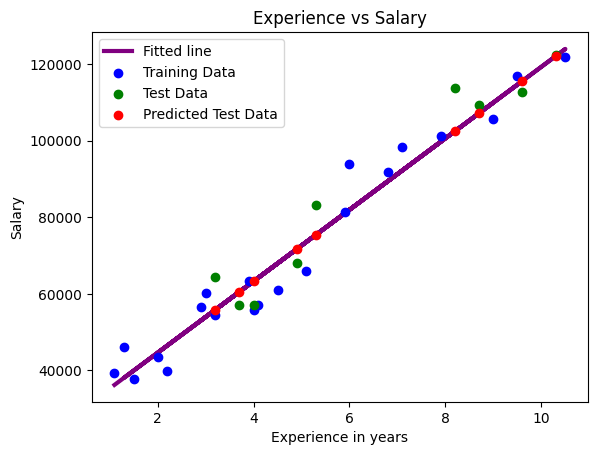

In [15]:
import matplotlib.pyplot as plt

# Plotting the fitted line
plt.plot(X_train, model.predict(X_train) , linewidth=3, color='purple', zorder=1, label='Fitted line')

# Scatter plot of the training data
plt.scatter(X_train, y_train, color='blue', zorder=2, label='Training Data')

# Scatter plot of the test data
plt.scatter(X_test, y_test, color='green', zorder=3, label='Test Data')

# Scatter plot of the predictions on the test data
plt.scatter(X_test, y_hat, color='red', zorder=4, label='Predicted Test Data')

# Adding title and labels
plt.title("Experience vs Salary")
plt.xlabel("Experience in years")
plt.ylabel("Salary")

# Adding legend
plt.legend()

# Show the plot
plt.show()


In [17]:
#Printing actual y_test and the predicted ones.
dict1 = {'y_test':y_test,
         'y_hat':y_hat}

df_test_pred = pd.DataFrame(dict1)
df_test_pred["Difference"] = y_test-y_hat
df_test_pred

,y_test,y_hat,Difference
27,112635.0,115573.622884,-2938.622884
15,67938.0,71679.938782,-3741.938782
23,113812.0,102498.908470,11313.091530
17,83088.0,75415.571471,7672.428529
8,64445.0,55803.499851,8641.500149
9,57189.0,60473.040713,-3284.040713
28,122391.0,122110.980090,280.019910
24,109431.0,107168.449332,2262.550668
12,56957.0,63274.765230,-6317.765230
